# Anopheles genomes phylogenetic scaffolding notebook

1. Yoann Aselmetti
2. Severine Berard
3. Eric Tannier
4. Cedric Chauve, Department of Mathematics, Simon Fraser University, cedric.chauve@sfu.ca

## Introduction

This notebook describes an improvement of the assembly of several mosquito genomes of the genus *Anopheles* using the newly developed phylogenetic scaffolding methods DeClone and ADseq.

In [1]:
import sys, math, numpy as np
%matplotlib inline  
import matplotlib, matplotlib.pyplot as plt

sys.path.insert(0, './scripts')
from declone_aux import *
from plotting import *

In [ ]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

## Material and methods

In [2]:
# Reading the genes file
GENES_import(read_tab_file("./data/anopheles_genes_filtered"))
OG_import(read_tab_file("./data/anopheles_genes_filtered"))
GENOMES_import(read_tab_file("./data/anopheles_genes_filtered"))
EXTANT_SPECIES=GENOMES_list() # List of all extant species

### Material

*Species tree (figure below), genes, chromosomes/scaffolds/contigs, gene families/orthogroups, gene trees*

![Species tree](images/anopheles_species_tree_labeled.png "*Anopheles* species tree")

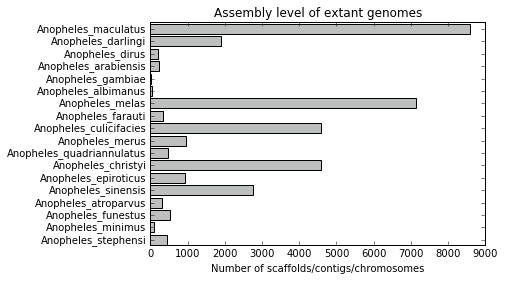

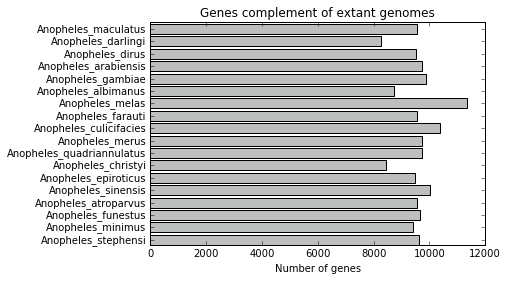

In [4]:
# Plotting the fragmentation and number of genes of each genome
GENOMES_EXTANT_FRAGMENTATION={sp: {0: GENOMES_nbscf(sp)} for sp in EXTANT_SPECIES}
xlabel = "Number of scaffolds/contigs/chromosomes"
title  = "Assembly level of extant genomes"
plot_scores_distribution_per_species(GENOMES_EXTANT_FRAGMENTATION, 1, 0.5, xlabel, title,0.8)

GENOMES_EXTANT_NBGENES={sp: {0: GENOMES_nbgenes(sp)} for sp in EXTANT_SPECIES}
xlabel = "Number of genes"
title  = "Genes complement of extant genomes"
plot_scores_distribution_per_species(GENOMES_EXTANT_NBGENES, 1, 0.5, xlabel, title,0.8)

### Methods

*ProfileNJ, DeClone, ADSeq, ideally joined into a single tool*

## Results

We now describe the results of our analysis, both in terms of scaffolding of extant *Anopheles* genomes, with a special focus on the genome *Anopheles funestus*, and of the ancestral genome maps we obtain, and what we can learn from them in terms of the evolution of the *Anopheles* genus.

In [5]:
# Reading the BESST file
BESST_import(read_tab_file("./data/anopheles_besst"))
# Reading the DeClone results file
DECLONE_import(read_tab_file("./results/anopheles_results_01_all"))
ADJACENCIES=DECLONE_adjacencies_list() # List of all adjacencies

In [6]:
# Computing the list of all species (id,name)
__ALL_SPECIES_AUX={}
for adj in ADJACENCIES: 
    (sp_id,sp_name)=(DECLONE_adj_species_id(adj),DECLONE_adj_species_name(adj))
    __ALL_SPECIES_AUX[(sp_id,sp_name)]=1
ALL_SPECIES=[]
for sp in __ALL_SPECIES_AUX.keys():
    ALL_SPECIES.append(sp)

In [7]:
# Here we record the number of adjacencies and conflicts for all species with adjacencies binned by bins of score 0.1
NB_BINS=10 # Binning the adjacencies by bins of size 0.1: bin i contains adjacencies of score <=0.1*i and < 0.1*(i+1)
IVALUES=range(0,NB_BINS+1)
ADJ_NB = {(sp_id,sp_name): len([adj for adj in ADJACENCIES if DECLONE_adj_species_id(adj)==sp_id]) for (sp_id,sp_name) in ALL_SPECIES} 
ADJ_DISTRIB = {(sp_id,sp_name): {t : 0 for t in IVALUES} for (sp_id,sp_name) in ALL_SPECIES}
for adj in ADJACENCIES: 
    (score,species) = (DECLONE_adj_score(adj), (DECLONE_adj_species_id(adj),DECLONE_adj_species_name(adj)))
    #if score<1.0 and species!="ANCESTRAL": # Scaffolding adjacency
    ADJ_DISTRIB[species][math.floor(score*NB_BINS)]+=1

### Gene trees

*To do: describe the improvement of the new gene trees, gene content, duplications, ...*

### Scaffolding extant genomes: overview

In this section, we present a general overview of the scaffolding adjacencies inferred by the methods ADseq+DeClone.

species name	<0.1	<0.2	<0.3	<0.4	<0.5	<0.6	<0.7	<0.8	<0.9	<1.0	<1.1
Anopheles_arabi	154	35	27	19	11	6	10	8	10	61	9263
Anopheles_culic	1124	12	25	132	289	291	149	69	66	3627	5585
Anopheles_darli	46	0	3	7	6	16	7	4	46	706	5571
Anopheles_atrop	121	24	8	4	1	4	1	1	2	41	8406
Anopheles_albim	2	0	0	0	0	0	0	0	0	0	7450
Anopheles_minim	19	0	0	1	1	2	0	0	2	24	9024
Anopheles_steph	59	2	0	4	10	24	4	11	5	255	8869
Anopheles_funes	81	0	11	12	6	10	2	10	21	333	8736
Anopheles_gambi	0	0	0	0	0	0	0	0	0	0	8902
Anopheles_dirus	23	0	3	0	3	1	1	5	3	66	8795
Anopheles_macul	1795	48	164	343	1588	325	55	186	69	5638	905
Anopheles_chris	902	2	28	53	156	85	123	75	77	3119	3801
Anopheles_merus	216	4	1	5	15	17	24	20	37	583	8515
Anopheles_sinen	330	21	66	120	163	201	82	44	68	1552	6648
Anopheles_farau	21	0	1	1	4	3	2	11	4	181	8621
Anopheles_quadr	115	4	14	11	8	15	12	10	8	240	9053
Anopheles_melas	2873	76	539	616	1302	870	91	394	122	3861	4109
Anopheles_epiro	231	14	5	8	17	31	13	30	26	601	8270


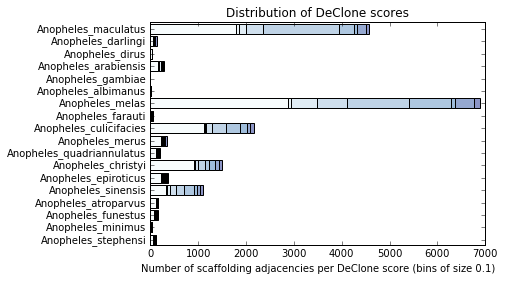

In [8]:
# Filtering for extant scaffolding adjacencies
EXTANT_SCAFF_ADJ={sp_name: ADJ_DISTRIB[(sp_id,sp_name)] for (sp_id,sp_name) in ALL_SPECIES if sp_name!="ANCESTRAL" }
# CC: I do not know how to generate a nice table: this is a pis-aller
print("species name\t"+"\t".join(["<"+str(((t+1)/NB_BINS)) for t in IVALUES]))
print("\n".join(sp_name[0:15]+"\t"+"\t".join(str(EXTANT_SCAFF_ADJ[sp_name][t]) for t in IVALUES) for (sp_id,sp_name) in ALL_SPECIES if sp_name!="ANCESTRAL" ))
# Figure
xlabel= "Number of scaffolding adjacencies per DeClone score (bins of size "+str(1.0/NB_BINS)+")"
title = "Distribution of DeClone scores"
plot_scores_distribution_per_species(EXTANT_SCAFF_ADJ, NB_BINS-1, 1.0, xlabel, title, 0.8)

We can observe on the table and figure above that many adjacencies seem to have a high DeClone score, although for highly fragmented genomes, we can observe a large number of poorly supported adjacencies. 

We now look at the number of conflicts, defined as either a gene with three or more neighbours, or a gene extremity with two neighbours.

In [11]:
NB_CONFLICTS={} # Number of conflicts per species, indexed by pairs (species_id,species_name)
NB_ADJACENCIES={} # Number of conflicts per species, indexed by pairs (species_id,species_name)
# Here we use an approximation that does not account for the orientation of adjacencies in extant species
__NGB_ALL={} # Number of neighbours of genes, indexed by pairs (tree,node)
for adj in ADJACENCIES: # Initializing the tables
    sp_name=DECLONE_adj_species_name(adj)
    sp_id=DECLONE_adj_species_id(adj)
    NB_CONFLICTS[(sp_id,sp_name)]={}
    NB_CONFLICTS[(sp_id,sp_name)][0]=0
    gene1=(DECLONE_adj_gene1_tree(adj),DECLONE_adj_gene1_node(adj))
    gene2=(DECLONE_adj_gene2_tree(adj),DECLONE_adj_gene2_node(adj))
    (__NGB_ALL[gene1],__NGB_ALL[gene2])=(0,0)
for adj in ADJACENCIES: # Filling the tables
    sp_name=DECLONE_adj_species_name(adj)
    sp_id=DECLONE_adj_species_id(adj)
    gene1=(DECLONE_adj_gene1_tree(adj),DECLONE_adj_gene1_node(adj))
    gene2=(DECLONE_adj_gene2_tree(adj),DECLONE_adj_gene2_node(adj))
    if __NGB_ALL[gene1]==2 or __NGB_ALL[gene2]==2:
        NB_CONFLICTS[(sp_id,sp_name)][0]+=1
    __NGB_ALL[gene1]+=1
    __NGB_ALL[gene2]+=1
NB_CONFLICTS_EXTANTS={sp_name: NB_CONFLICTS[(sp_id,sp_name)] for (sp_id,sp_name) in ALL_SPECIES if sp_name!="ANCESTRAL" }
NB_CONFLICTS_ANC={sp_id: NB_CONFLICTS[(sp_id,sp_name)] for (sp_id,sp_name) in ALL_SPECIES if sp_name=="ANCESTRAL" }

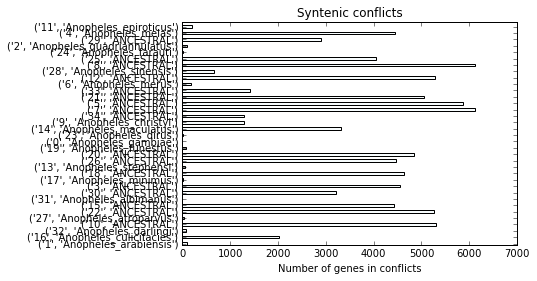

In [10]:
# Figure
xlabel= "Number of genes in conflicts in extant genomes"
title = "Syntenic conflicts"
plot_scores_distribution_per_species(NB_CONFLICTS_EXTANT, 1, 1.0, xlabel, title,0.8)
xlabel= "Number of genes in conflicts in extant genomes"
title = "Syntenic conflicts"
plot_scores_distribution_per_species(NB_CONFLICTS_EXTANT, 1, 1.0, xlabel, title,0.4)

### *Anopheles funestus* scaffolding

### Ancestral genomes and evolution

The DeClone/ADseq method infers both extant and ancestral adjacencies, thus paving the way to analyse the evolution of genome organization over the considered species tree.

#### Overview of ancestral adjacencies



## Discussion

## References